In [1]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

## Concurrency

In [2]:
import concurrent.futures as fut

pool = fut.ProcessPoolExecutor(4)

thread_pool = fut.ThreadPoolExecutor(1000)

def restart_pool():
    global pool
    
    del pool
    pool = fut.ProcessPoolExecutor(4)

In [3]:
def benchmark_prop(prop, duration, **kwargs):
    agg_metric = instrumentation.AggregateMetric()
    tim, sig = test_monitoring(prop, duration,
                               instrumentor=agg_metric, **kwargs)
    return sig, tim, agg_metric

def schedule_test(prop, duration, **kwargs):
    return {
        'prop': prop,
        'duration': duration,
        'kwargs': kwargs,
        'future': pool.submit(
            benchmark_prop, prop, duration, **kwargs),
    }

from gi.repository import Notify
Notify.init("LBUC Benchmarking")

def notify_when_done(ress, task_description=None):
    fut.wait(futures(ress))
    
    if task_description is None:
        Notify.Notification.new("Benchmark run done!").show()
    else:
        Notify.Notification.new("Benchmark run done!",
                                task_description).show()

def futures(results):
    return [res['future'] for res in results]

def gen_results(n, *args, task_description=None, **kwargs):
    results = [
        schedule_test(*args, **kwargs)
            for _ in range(n)
    ]
    thread_pool.submit(notify_when_done, results, task_description)
    return results

<ipython-input-3-b0324e55b331>:16: PyGIWarning: Notify was imported without specifying a version first. Use gi.require_version('Notify', '0.7') before import to ensure that the right version gets loaded.
  from gi.repository import Notify


## Properties

In [4]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [5]:
Q = Atomic(var("x4") > 1/50); Q

Atomic(x4 > (1/50))

In [57]:
I = RIF(3, 3.5)

## Launch Runs

In [7]:
num_runs = 1
duration = 2

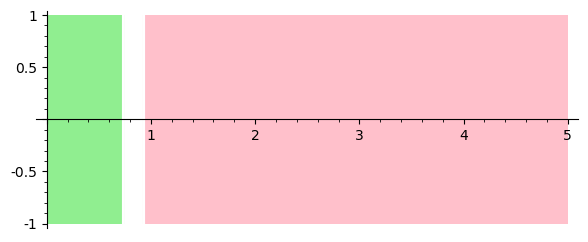

In [50]:
sigP = results[-1]['future'].result()[0]
sigP.plot()

In [8]:
results = []

In [45]:
results.extend(gen_results(
    num_runs,
    P,
    5,
    task_description='Unmasked P',
    use_masks=False,
    symbolic_composition=True,
))

In [9]:
results.extend(gen_results(
    num_runs,
    P & F(I, Atomic(var("x4") > 1/100)),
    duration,
    task_description='Unmasked P & F(x4 > 1/100)',
    use_masks=False,
    symbolic_composition=True,
))

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
calling reach with y0 = ['[0.

crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 21.97 seconds
roots = [[4.2345044899441264 .. 5.0040000000001533]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[4.2345044899441264 .. 5.0040000000001533]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[4.2345044899441264 .. 5.0040000000001533]]
0 at 5.00200000000000
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 2.6226043701171875e-05
ran "restoring globals" 9 times in 0.001021862030029

fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.80 seconds
roots = [[0.011824719935673961 .. 0.012000000000000002], [0.013420332593621079 .. 0.024000000000000011]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.011824719935673961 .. 0.012000000000000002], 
 [0.013420332593621079 .. 0.024000000000000011]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.011824719935673961 .. 0.012000000000000002], 
 [0.013420332593621079 .. 0.024000000000000011]]
signal given bool roots: 1 items in 0.02 seconds
ran "Precomposing Contexts" 1 times in 1.1920928955078125e-05
ran "restoring globals" 9 times in 0.0007460117340087891
ran "capturing globals [on exit]" 9 times in 0.0004088878631591797
ran "Running Flow*" 1 times in 52.66009068489075
ran "mask intersect check" 1668 times in 0.003300905227661133
ran "tentative eva

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 16.99 seconds
roots = [[0.020809676002323924 .. 0.021000000000000009], [0.022511463526056034 .. 0.051000000000000039], [0.052525529450642080 .. 0.054000000000000042], [0.055472376449825465 .. 0.055472388333945591], [0.055500401904899708 .. 0.76500000000000068]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.020809676002323924 .. 0.021000000000000009], 
 [0.022511463526056034 .. 0.051000000000000039], 
 [0.05252552945064208

ran "prepare in check" 1 times in 1.239776611328125e-05
ran "check boolean [unguarded]" 1 times in 0.0004863739013671875
ran "observer.check" 1 times in 0.0005943775177001953
ran "Monitoring atomic x4 > (11/125)" 1 times in 2.074469566345215
ran "Monitoring Signal for x4 > (11/125)" 1 times in 2.1103250980377197
Run done in 56.02734351158142 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a60fb340>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_init

ran "tentative eval" 1668 times in 1.8839657306671143
ran "composing flowpipe" 1 times in 0.0037658214569091797
ran "whole domain eval" 1 times in 0.0011425018310546875
ran "post retrieve" 1 times in 7.3909759521484375e-06
ran "root detection" 1 times in 0.004792213439941406
ran "root amalgamation" 1 times in 4.0531158447265625e-06
ran "prepare in check" 1 times in 1.52587890625e-05
ran "check boolean [unguarded]" 1 times in 0.000598907470703125
ran "observer.check" 1 times in 0.0007600784301757812
ran "Monitoring atomic x4 > (14/125)" 1 times in 1.9433884620666504
ran "Monitoring Signal for x4 > (14/125)" 1 times in 2.972576379776001
Run done in 55.59986209869385 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a273a0c0>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999

ran "observer.check" 1 times in 0.0006566047668457031
ran "Monitoring atomic x4 > (16/125)" 1 times in 1.8308420181274414
ran "Monitoring Signal for x4 > (16/125)" 1 times in 1.8727068901062012
Run done in 61.67215156555176 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a57a16c0>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 2.55 seconds
roots = []
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 1.0728836059570312e-05
ran "restoring globals" 9 times in 0.0008997917175292969
ran "capturing globals [on exit]" 9 times in 0.0004949569702148438
ran "Running Flow*" 1 times in 72.89029574394226
ran "

ran "capturing globals [on exit]" 9 times in 0.0013077259063720703
ran "Running Flow*" 1 times in 57.641679763793945
ran "mask intersect check" 1668 times in 0.0033485889434814453
ran "tentative eval" 1668 times in 1.9148204326629639
ran "prepare in check" 1 times in 1.5497207641601562e-05
ran "check boolean [unguarded]" 1 times in 0.0006241798400878906
ran "observer.check" 1 times in 0.0007793903350830078
ran "Monitoring atomic x4 > (1/5)" 1 times in 1.9671826362609863
ran "Monitoring Signal for x4 > (1/5)" 1 times in 2.007842779159546
Run done in 59.83388113975525 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a273a440>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.27999999

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 56.81735013300204 sec
PolyObserver(x4 - 0.2240000000000000?, <flowstar.reachability.Reach object at 0x7f76c07fa9e0>, x2*x6 - 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.15 seconds
roots = []
domain = [0.000000000000000

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.31 seconds
roots = []
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 9.775161743164062e-06
ran "restoring globals" 9 times in 0.0008080005645751953
ran "capturing globals [on exit]" 9 times in 0.00044918060302734375
ran "Running Flow*" 1 times in 53.19559836387634
ran "mask intersect check" 1668 times in 0.0036649703979492188
ran "tentative eval" 1668 times in 2.280378580093384
ran "prepare in check" 1 times in 1.4781951904296875e-05
ran "check boolean [unguarded]" 1 times in 0.0006945133209228516
ran "observer.check" 1 times in 0.0008525848388671875
ran "Monitoring atomic x4 > (31/125)" 1 times in 2.329108238220215
ran "Monitoring Signal for x4 > (31/125)" 1 times in 2.38173508644104
Run done in 55.72391152381897 sec
options: 

ran "Monitoring Signal for x4 > (34/125)" 1 times in 1.7251307964324951
Run done in 57.92400026321411 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a1fe71c0>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.120000000000000

C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 51.41403542700573 sec
PolyObserver(x4 - 0.3040000000000000?, <flowstar.reachability.Reach object at 0x7f76c07fb3c0>, x2*x6 - 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.70 seconds
roots = []
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Pre

roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 1.049041748046875e-05
ran "restoring globals" 9 times in 0.0007493495941162109
ran "capturing globals [on exit]" 9 times in 0.0005095005035400391
ran "Running Flow*" 1 times in 57.836453914642334
ran "mask intersect check" 1668 times in 0.0032057762145996094
ran "tentative eval" 1668 times in 1.6800782680511475
ran "prepare in check" 1 times in 1.1444091796875e-05
ran "check boolean [unguarded]" 1 times in 0.0004858970642089844
ran "observer.check" 1 times in 0.0006015300750732422
ran "Monitoring atomic x4 > (41/125)" 1 times in 1.7213423252105713
ran "Monitoring Signal for x4 > (41/125)" 1 times in 1.769223928451538
Run done in 59.75046348571777 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a1f6ed40>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.

fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.33 seconds
roots = []
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 1.239776611328125e-05
ran "restoring globals" 9 times in 0.00084686279296875
ran "capturing globals [on exit]" 9 times in 0.0005176067352294922
ran "Running Flow*" 1 times in 47.8304238319397
ran "mask intersect check" 1668 times in 0.002976655960083008
ran "tentative eval" 1668 times in 1.3102154731750488
ran "prepare in check" 1 times in 1.4543533325195312e-05
ran "check boolean [unguarded]" 1 times in 0.0006420612335205078
ran "observer.check" 1 times in 0.0007948875427246094
ran "Monitoring atomic x4 > (49/125)" 1 times in 1.34340500831604
ran "Monitor

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 44.13 seconds
roots = [[3.1346510917403218 .. 3.1346511285317949], [3.1347956617751462 .. 3.1347956641353827], [3.1348197121850143 .. 3.1350000000000820], [3.1365070783989494 .. 5.0040000000001533]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[3.1346510917403218 .. 3.1346511285317949], 
 [3.1347956617751462 .. 3.1347956641353827], 
 [3.1348197121850143 .. 3.1350000000000820], 
 [3.1365070783989494 .. 5.0040000000001533]]
s

C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 60.45261893000861 sec
PolyObserver(x4 - 0.006400000000000000?, <flowstar.reachability.Reach object at 0x7f76c07fdd60>, x2*x6 - 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
Computed 1668 flowpipes in 53.78311537800619 sec
PolyObserver(x4 - 0.00800000000000000?, <flowstar.reachability.Reach object at 0x7f76c07fb820>, x2*x6 - 100*x4, symbolic_composition=False, tentative

roots = [[1.3106391924157481 .. 2.1840000000000460], 
 [2.1858267219240108 .. 2.1858267601806314], 
 [2.1858384324593469 .. 2.1858384591739935], 
 [2.1858501245057904 .. 2.1858502504235285], 
 [2.1864031910737606 .. 2.1864031928925312], 
 [2.1864090335240073 .. 2.1864090497777960], 
 [2.1864148774096605 .. 2.1864149462504319], 
 [2.1866554815713468 .. 2.1866554924749285], 
 [2.1866584096464745 .. 2.1866584292109366], 
 [2.1867757185559573 .. 2.1867757318935644], 
 [2.1868140430668741 .. 2.1870000000000461]]
signal given bool roots: 1 items in 0.09 seconds
ran "Precomposing Contexts" 1 times in 1.0013580322265625e-05
ran "restoring globals" 9 times in 0.0007560253143310547
ran "capturing globals [on exit]" 9 times in 0.0003705024719238281
ran "Running Flow*" 1 times in 53.51859927177429
ran "mask intersect check" 1668 times in 0.0031304359436035156
ran "tentative eval" 1668 times in 1.5469274520874023
ran "composing flowpipe" 415 times in 20.636276960372925
ran "whole domain eval" 405 t

ran "Monitoring Signal for x4 > (7/625)" 1 times in 30.624522924423218
Run done in 93.12449669837952 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a2729380>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.1200000000000000

ran "Precomposing Contexts" 1 times in 1.0251998901367188e-05
ran "restoring globals" 9 times in 0.0011506080627441406
ran "capturing globals [on exit]" 9 times in 0.0006198883056640625
ran "Running Flow*" 1 times in 64.2071373462677
ran "mask intersect check" 1668 times in 0.0035860538482666016
ran "tentative eval" 1668 times in 1.9079663753509521
ran "composing flowpipe" 365 times in 21.150431871414185
ran "whole domain eval" 365 times in 0.830763578414917
ran "post retrieve" 249 times in 0.002044677734375
ran "root detection" 249 times in 1.3890330791473389
ran "root amalgamation" 249 times in 0.000949859619140625
ran "prepare in check" 2 times in 1.6689300537109375e-05
ran "check boolean [unguarded]" 2 times in 0.0007593631744384766
ran "observer.check" 2 times in 0.0009622573852539062
ran "Monitoring atomic x4 > (9/625)" 1 times in 25.361022472381592
ran "Monitoring Signal for x4 > (9/625)" 1 times in 25.403637886047363
Run done in 89.76249718666077 sec
options: {'instrumentor': <

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 54.50216577000538 sec
PolyObserver(x4 - 0.02400000000000000?, <flowstar.reachability.Reach object at 0x7f76c07fae40>, x2*x6 - 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 19.47 seconds
roots = [[0.031829019669856482 .. 1.

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 54.498218818007444 sec
PolyObserver(x4 - 0.02560000000000000?, <flowstar.reachability.Reach object at 0x7f76c081c040>, x2*x6 - 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 13.72 seconds
roots = [[0.017947940050842964 .. 0

ran "observer.check" 2 times in 0.0006220340728759766
ran "Monitoring atomic x4 > (17/625)" 1 times in 10.262553215026855
ran "Monitoring Signal for x4 > (17/625)" 1 times in 10.3068368434906
Run done in 69.67148804664612 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76c0802a00>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.0799999999

ran "tentative eval" 1668 times in 1.775766134262085
ran "composing flowpipe" 4 times in 0.1125032901763916
ran "whole domain eval" 4 times in 0.010427236557006836
ran "post retrieve" 4 times in 3.528594970703125e-05
ran "root detection" 4 times in 0.025130748748779297
ran "root amalgamation" 4 times in 1.6689300537109375e-05
ran "prepare in check" 2 times in 1.9311904907226562e-05
ran "check boolean [unguarded]" 2 times in 0.0005946159362792969
ran "observer.check" 2 times in 0.0007565021514892578
ran "Monitoring atomic x4 > (21/625)" 1 times in 1.968954086303711
ran "Monitoring Signal for x4 > (21/625)" 1 times in 2.0049612522125244
Run done in 57.47321534156799 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f76a96405c0>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999

domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.0081081768802846523 .. 0.018000000000000006]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.0081081768802846523 .. 0.018000000000000006]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 1.1682510375976562e-05
ran "restoring globals" 9 times in 0.0014240741729736328
ran "capturing globals [on exit]" 9 times in 0.0006291866302490234
ran "Running Flow*" 1 times in 55.17554998397827
ran "mask intersect check" 1668 times in 0.003926753997802734
ran "tentative eval" 1668 times in 1.9982359409332275
ran "composing flowpipe" 4 times in 0.07571029663085938
ran "whole domain eval" 4 times in 0.0061626434326171875
ran "post retrieve" 4 times in 3.4332275390625e-05
ran "root detection" 4 times in 0.021900177001953125
ran "root amalgamation" 4 times in 1.0967254638671875e-05
ran "prepare in check" 2 times in 2.0742416381835938e-05
ran "check boolean [unguarded]" 2 times in 0

fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.21 seconds
roots = [[0.0058908591654022951 .. 0.0060000000000000002], [0.0075454394007714153 .. 0.015000000000000003]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.0058908591654022951 .. 0.0060000000000000002], 
 [0.0075454394007714153 .. 0.015000000000000003]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.0058908591654022951 .. 0.0060000000000000002], 
 [0.0075454394007714153 .. 0.015000000000000003]]
signal given bool roots: 1 items in 0.03 seconds
ran "Precomposing Contexts" 1 times in 8.821487426757812e-06
ran "restoring globals" 9 times in 0.0012958049774169922
ran "capturing globals [on exit]" 9 times in 0.000659942626953125
ran "Running Flow*" 1 times in 67.48382234573364
ran "mask intersect check" 1668 times in 0.003236532211303711
ran "tentat

vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 58.00543372200627 sec
PolyObserver(x4 - 0.04800000000000000?, <flowstar.reachability.Reach object at 0x7f76c07fde40>, x2*x6 - 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.62 seconds
roots = [[0.0050976396812772049 .. 0.013392619406423662]]
domain = [0.0000000000000000 .. 5.0019999999999

In [10]:
5/125

1/25

In [25]:
srange(0, 3/25, (1/25)**2)

[0,
 1/625,
 2/625,
 3/625,
 4/625,
 1/125,
 6/625,
 7/625,
 8/625,
 9/625,
 2/125,
 11/625,
 12/625,
 13/625,
 14/625,
 3/125,
 16/625,
 17/625,
 18/625,
 19/625,
 4/125,
 21/625,
 22/625,
 23/625,
 24/625,
 1/25,
 26/625,
 27/625,
 28/625,
 29/625,
 6/125,
 31/625,
 32/625,
 33/625,
 34/625,
 7/125,
 36/625,
 37/625,
 38/625,
 39/625,
 8/125,
 41/625,
 42/625,
 43/625,
 44/625,
 9/125,
 46/625,
 47/625,
 48/625,
 49/625,
 2/25,
 51/625,
 52/625,
 53/625,
 54/625,
 11/125,
 56/625,
 57/625,
 58/625,
 59/625,
 12/125,
 61/625,
 62/625,
 63/625,
 64/625,
 13/125,
 66/625,
 67/625,
 68/625,
 69/625,
 14/125,
 71/625,
 72/625,
 73/625,
 74/625]

In [32]:
restart_pool()

In [38]:
results_Q = [gen_results(
    1,
    Atomic(var("x4") > k),
    5,
    task_description=f'x4 > {k}',
    use_masks=False,
    symbolic_composition=False,
) for k in srange(0, 1/125, (1/25)**2/4)]

In [39]:
futures(sum(results_Q, []))

[<Future at 0x7f76a0192d30 state=running>,
 <Future at 0x7f76a0192fd0 state=running>,
 <Future at 0x7f76a002a130 state=running>,
 <Future at 0x7f76a002a3d0 state=running>,
 <Future at 0x7f76a002a670 state=running>,
 <Future at 0x7f76a002a880 state=pending>,
 <Future at 0x7f76a002ab20 state=pending>,
 <Future at 0x7f76a002adf0 state=pending>,
 <Future at 0x7f76a00380a0 state=pending>,
 <Future at 0x7f76a0038340 state=pending>,
 <Future at 0x7f76a0038610 state=pending>,
 <Future at 0x7f76a00389d0 state=pending>,
 <Future at 0x7f76a0038cd0 state=pending>,
 <Future at 0x7f76a0038f70 state=pending>,
 <Future at 0x7f76a000f0d0 state=pending>,
 <Future at 0x7f76a000f340 state=pending>,
 <Future at 0x7f76a000f5e0 state=pending>,
 <Future at 0x7f76a000f880 state=pending>,
 <Future at 0x7f76a000fb20 state=pending>,
 <Future at 0x7f76a000fdf0 state=pending>]

In [41]:
[
    res.result()[0]
    for res in futures(sum(results_Q, []))
]

[Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 4.2345044899441265], True)], mask=None),
 Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.9113797268860311], True), ([3.9113798049949468 .. 3.9113914987521179], True), ([3.9113915446469524 .. 3.9115181579236556], True), ([3.9115181910765945 .. 3.9115240130448737], True), ([3.9115240304246694 .. 3.9115862977545173], True), ([3.9115863356001527 .. 3.9115892786272220], True), ([3.9115893091094027 .. 3.9116228217481087], True), ([3.9116228359403470 .. 3.9116242075882056], True), ([3.9116242182904392 .. 3.9116308832690084], True), ([3.9120000000001113 .. 3.9135015276560883], True)], mask=None),
 Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.6112611364871592], True)], mask=None),
 Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.3502607162447249], True), ([3.3510000000000901 .. 3.3525003783126013], True)], mask=None),
 Signal(

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


Animation with 20 frames
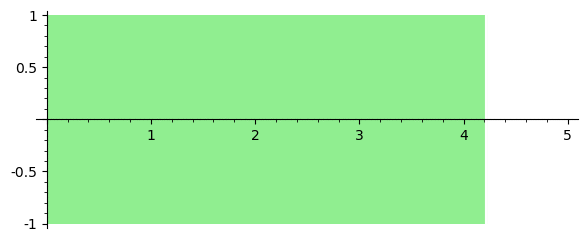

In [42]:
animate([
    res.result()[0].plot()
    for res in futures(sum(results_Q, []))
])

In [22]:
from sage.repl.ipython_kernel.interact import interact

In [58]:
@interact
def _(i=slider(0, len(results_Q))):
    k = list(srange(0, 1/125, (1/25)**2/4))[i]
    print(f"result {i} with k={k}")
    sigQ = futures(sum(results_Q, []))[i].result()[0]
    return (~sigQ).plot()

Interactive function <function _ at 0x7f76a04ee0d0> with 1 widget
  i: TransformIntSlider(value=0, description…

In [60]:
@interact
def _(i=slider(0, len(results_Q))):
    k = list(srange(0, 1/125, (1/25)**2/4))[i]
    print(f"result {i} with k={k}")
    sigQ = futures(sum(results_Q, []))[i].result()[0]
    sigP.plot().show()
    (~sigQ).F(I).plot().show()
    (sigP | (~sigQ).G(I)).plot().show()

Interactive function <function _ at 0x7f76786b63a0> with 1 widget
  i: TransformIntSlider(value=0, description…

In [17]:
futures(results)

[<Future at 0x7f697a097760 state=running>]

In [18]:
results[-1]['future'].result()[0]

Signal([0.0000000000000000 .. 2.0000000000000000], [([0.0000000000000000 .. 2.0000000000000000], False)], mask=None)

# Analysis

In [1]:
import pandas as pd

In [2]:
def total_time_for_key(inst, ks):
    if isinstance(ks, str):
        ks = [ks]

    return sum(inst.total_time(k)
               for k in ks)


def total_times(results, keys, keys_short=None):
    ress = [
        f.result() for f in futures(results)
    ]
    if keys_short is None:
        keys_short = keys
    data = pd.DataFrame({
        short_key: [total_time_for_key(r[2], key) for r in ress]
        for short_key, key in zip(keys_short, keys)
    })
    data.insert(len(keys), 'Total',
                [r[1] for r in ress])
    return data

In [3]:
results_unmasked[0]['future'].result()[2].events

NameError: name 'results_unmasked' is not defined

In [32]:
cols_full = [
    'Running Flow*',
    f'Monitoring atomic {P}',
    f'Monitoring atomic {Q}',
    [
        f'Monitoring Signal for {P & F(I, Q)}',
        f'Monitoring Signal for {F(I, Q) & P}',
    ],
    'tentative eval',
    'root detection',
    'composing flowpipe',
]
cols_short = [
    'Flow*', 'P', 'Q', 'P & F(Q)',
    'tentative eval',
    'root detection',
    'composing flowpipe',
]

## Raw results